# Corner Detection

----

### The Image Data

In [ ]:
# Import cv2, numpy, matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

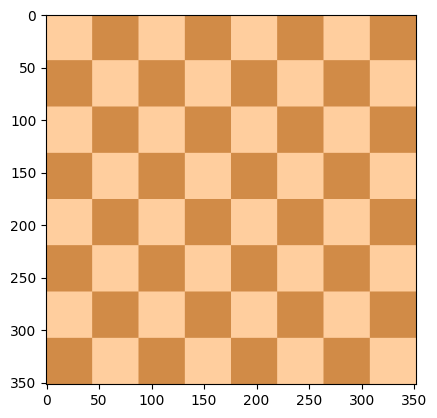

In [ ]:
# import flat_chessboard imqge in flat_chess object
flat_chess = cv2.imread('flat_chessboard.png')
# Correct the color distribution to RGB
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
# Plot the flat_chess image
plt.imshow(flat_chess)


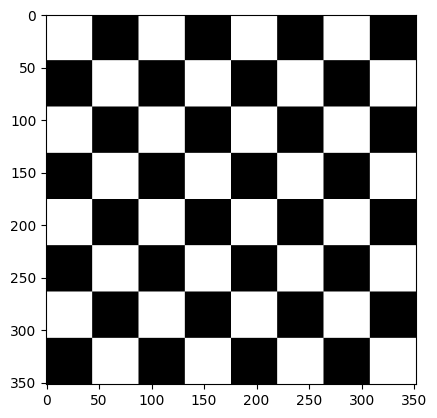

In [ ]:
# convert flat_chet to gray image in gray_lat_chess object
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)
# plot it, dont forget to use cmap='gray' parameter
plt.imshow(gray_flat_chess,cmap='gray')

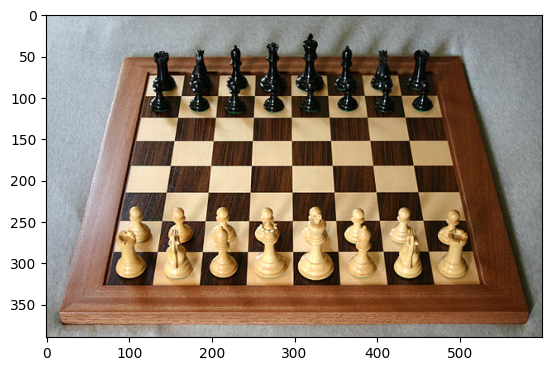

In [ ]:
# read real_chessboard image in real_chess object
real_chess = cv2.imread('real_chessboard.jpg')
# correct the color distribution
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
# plot it
plt.imshow(real_chess)

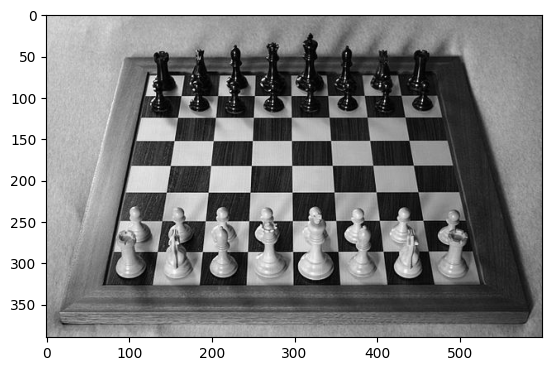

In [ ]:
# convert it to gray scale
real_chess_gray=cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
# plot it, dont forget to use cmap='gray' parameter
plt.imshow(real_chess_gray,cmap='gray')
# plot it


# Harris Corner Detection

**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

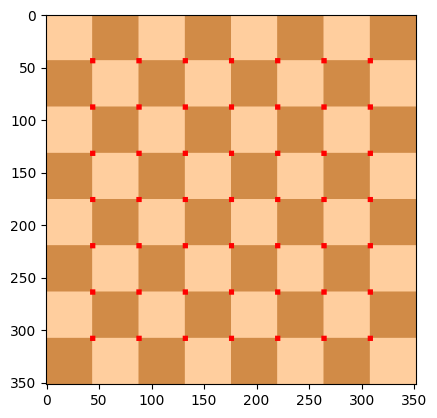

In [ ]:
# Understand the following instructions

# Convert Gray Scale Image to Float Values
gray = np.float32(gray_flat_chess)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
flat_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(flat_chess)

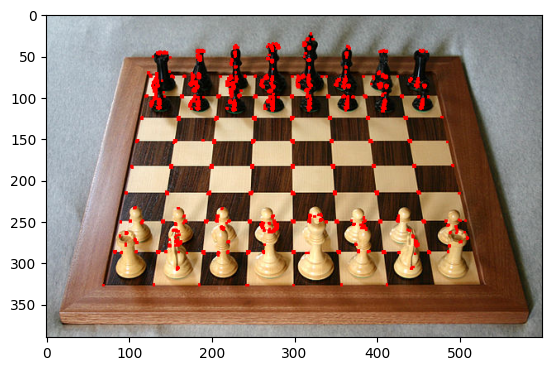

In [ ]:
# Use the same above instructions for gray_real_chess image

# Convert Gray Scale Image to Float Values
gray = np.float32(real_chess_gray)

# Corner Harris Detection
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown

dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
real_chess[dst>0.01*dst.max()]=[255,0,0]

# Plot it
plt.imshow(real_chess)


-----

## Shi-Tomasi Corner Detector & Good Features to Track Paper

[Link to Paper from Video](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

goodFeatureToTrack Function Parameters

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.

In [ ]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

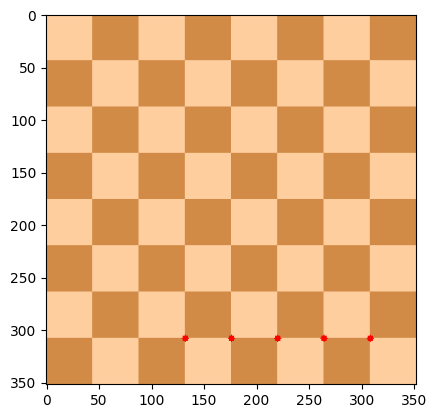

In [ ]:
# Understand the following instructions
corners = cv2.goodFeaturesToTrack(gray_flat_chess,5,0.01,10)
#corners = np.int0(corners)
corners = np.intp(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)

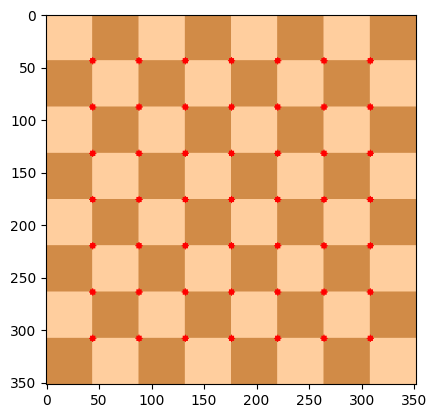

In [ ]:
# Apply the same above instructions but using 64 istead of 4, as the number of the detected corners
corners = cv2.goodFeaturesToTrack(gray_flat_chess,65,0.01,10)
corners = np.intp(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)

plt.imshow(flat_chess)


-----

In [ ]:
# Read again real_chessboard image, correct the colors ditribution and convert it to gray scale
real_chess = cv2.imread('real_chessboard.jpg')
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

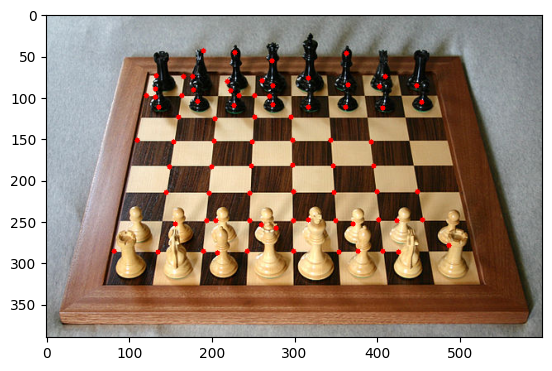

In [ ]:
# Use the above instructions for gray_real_chess image and using 80 as the number of the detected corners
corners = cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners = np.intp(corners)
plt.imshow(real_chess)
for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)

plt.imshow(real_chess)

-----